In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [295]:
alpha = 1

num_itr = 5000

stdL = np.arange(0,5.1,.1)
D = -np.ones([num_itr,len(stdL)])

for std_idx,std in enumerate(stdL):
  for itr in range(num_itr):
    v_t = np.array([0.,0.])
    arr = -np.ones([num_itr,2])
    for step in range(4):
      arr[step] = v_t
      delta_t = alpha*np.random.normal(1,std,2)
      v_t += delta_t/np.linalg.norm(delta_t)
    D[itr,std_idx] = np.correlate(arr[1].T,arr[-1].T)



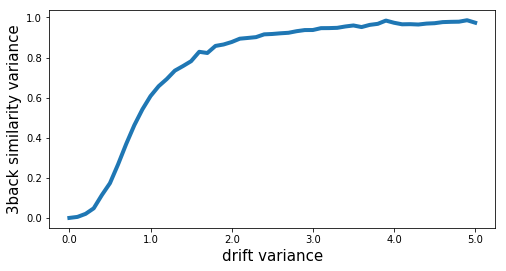

In [308]:
plt.figure(figsize=(8,4))
ax = plt.gca()
ax.plot(D.std(0),lw=4)
xt = np.arange(0,len(stdL),10)
ax.set_xticks(xt)
ax.set_xticklabels(stdL[xt].round(1))
ax.set_xlabel('drift variance',fontsize=15)
ax.set_ylabel('3back similarity variance',fontsize=15)
plt.savefig('figures/drif-variance-simluation')

In [313]:
stdL = np.arange(0,2.1,.5)
stdL

array([0. , 0.5, 1. , 1.5, 2. ])

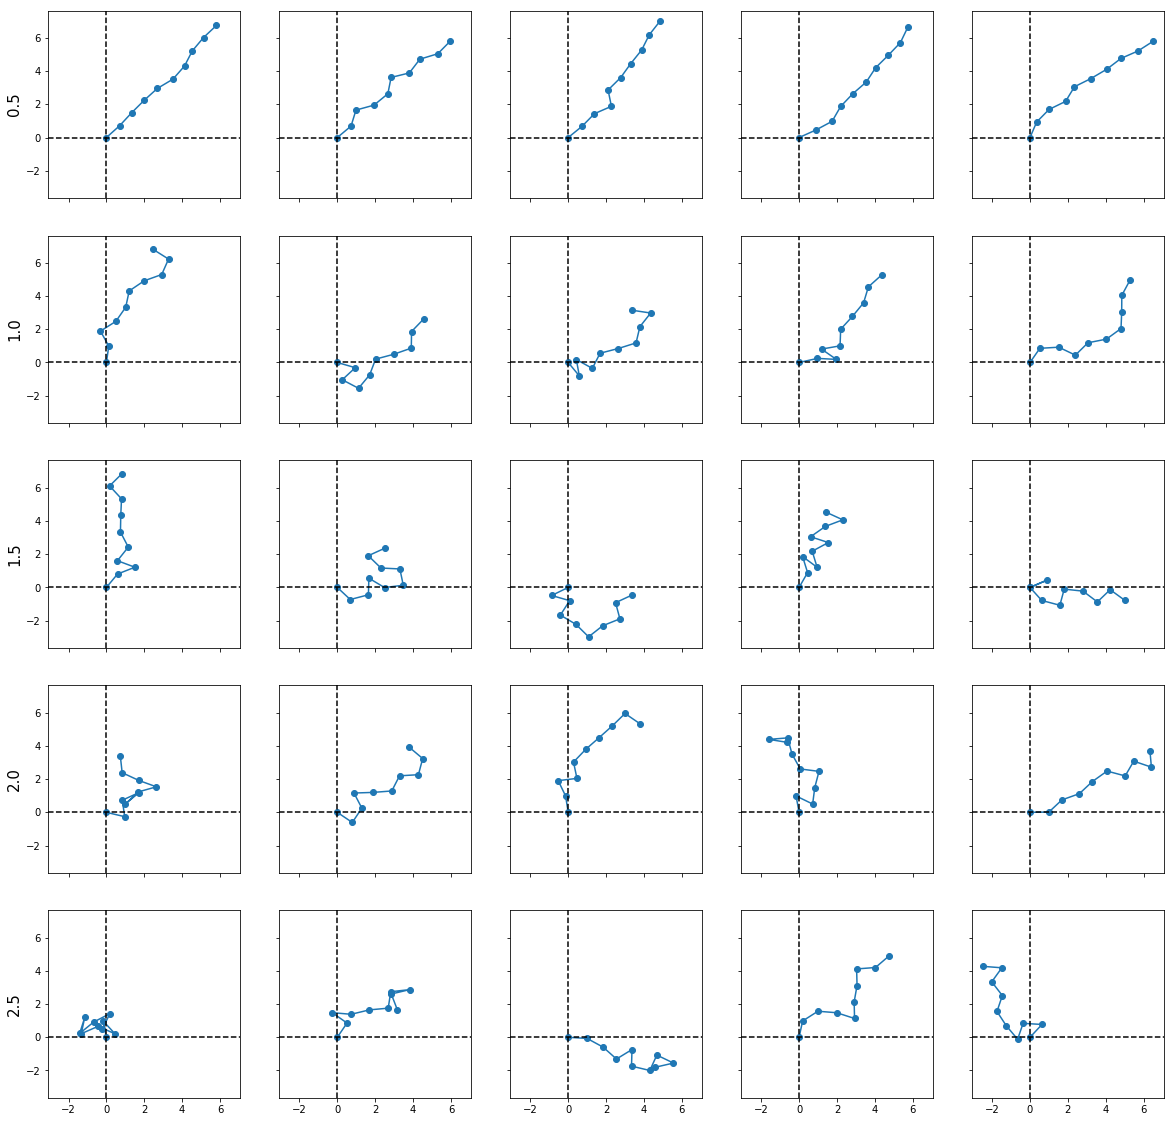

In [334]:
alpha = 1

num_itr = 5
num_steps = 10

stdL = np.arange(.5,2.6,.5)
D = -np.ones([num_itr,len(stdL)])
fig,axarr = plt.subplots(5,5,figsize=(20,20),sharex=True,sharey=True)

for std_idx,std in enumerate(stdL):
  for itr in range(num_itr):
    v_t = np.array([0.,0.])
    arr = -np.ones([num_steps,2])
    for step in range(num_steps):
      arr[step] = v_t
      delta_t = alpha*np.random.normal(1,std,2)
      v_t += delta_t/np.linalg.norm(delta_t)
    ax = axarr[std_idx,itr]
    ax.scatter(arr[:,0],arr[:,1])
    ax.plot(arr[:,0],arr[:,1])
    ax.axvline(0,c='black',ls='--')
    ax.axhline(0,c='black',ls='--')
  axarr[std_idx,0].set_ylabel(std,fontsize=15)
plt.savefig('figures/drif-variance-simluation_samples')


In [12]:
np.ones(1).dtype

dtype('float64')